## PARITE DATA 
SONIA SAI 
ETIA-ANAELLE SAKOA

## PARTIE A : ANALYSE ET PRÉTRAITEMENT


Cette partie vise à faire une analyse exploratoire des données récoltées et une segmentation du marché boursier

# 1. Collecte des données 

In [1]:
!pip install yfinance


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 217.9 kB/s eta 0:00:14
     ---------------------------------------- 0.0/3.0 MB 259.2 kB/s eta 0:00:12
      --------------------------------------- 0.1/3.0 MB 290.5 kB/s eta 0:00:11
     -- ------------------------------------- 0.2/3.0 MB 1.0 MB/s eta 0:00:03
     ---- ----------------------------------- 0.4/3.0 MB 1.6 MB/s eta 0:00:02
     ------- -------------------------------- 0.6/3.0 MB 2.2 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 2.3 MB/s eta 0:00:01
     ------------- -------------------------- 1.1/3.0 MB 2.9 MB/s eta 0:00:01
     ----------------- ---------------------- 1.3/3.0 MB 3.1 MB/s eta 0:00:01
     ------------------- -------------------- 1.5/3.0 MB 3.1 MB/s eta 0:00:01
     --------------------- ------------------ 1.6/3.0 MB 3.2 MB/s eta 0

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
start_date = "2018-01-01"
end_date = "2024-12-31"

In [4]:
#téléchargement des données
tickers = ['TSLA', 'AAPL', 'GOOG', 'AMZN', 'META']  
data = yf.download(tickers, start=start_date, end=end_date)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [5]:
data.to_csv("donnees_boursieres.csv")

# 2. Analyse et prétraitement des données 

In [8]:
# 1. Analyse exploratrice :
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [10]:
fichier="donnees_boursieres.csv"
df_bours=pd.read_csv(fichier, sep=";")
df_bours.head()

,"Price,Close,Close,Close,Close,Close,High,High,High,High,High,Low,Low,Low,Low,Low,Open,Open,Open,Open,Open,Volume,Volume,Volume,Volume,Volume"
0,"Ticker,AAPL,AMZN,GOOG,META,TSLA,AAPL,AMZN,GOOG..."
1,"Date,,,,,,,,,,,,,,,,,,,,,,,,,"
2,"2018-01-02,40.479835510253906,59.4505004882812..."
3,"2018-01-03,40.4727897644043,60.209999084472656..."
4,"2018-01-04,40.66079330444336,60.47949981689453..."


In [11]:
#Nettoyage et réorganisation du csv 
df_bours = pd.read_csv("./donnees_boursieres.csv", header=[0, 1])
df_final = df_bours[2:].copy()
df_final.reset_index(drop=True, inplace=True)

#Fusion les colonnes multi-index en colonnes lisibles
df_final.columns = [f"{col[0]}_{col[1]}" if col[0] not in ["Price", "Ticker", "Date"] else f"{col[0]}" for col in df_final.columns]

#Colonne date : renomme
possible_date_col = [col for col in df_final.columns if "Date" in col or "Price" in col]
if possible_date_col:
    df_final.rename(columns={possible_date_col[0]: "Date"}, inplace=True)

#Convertir la colonne Date en datetime
df_final["Date"] = pd.to_datetime(df_final["Date"], errors="coerce")

#Supprimer les lignes sans date
df_final = df_final.dropna(subset=["Date"])
df_final.reset_index(drop=True, inplace=True)
df_final.head()


,Date,Close_AAPL,Close_AMZN,Close_GOOG,Close_META,Close_TSLA,High_AAPL,High_AMZN,High_GOOG,High_META,...,Open_AAPL,Open_AMZN,Open_GOOG,Open_META,Open_TSLA,Volume_AAPL,Volume_AMZN,Volume_GOOG,Volume_META,Volume_TSLA
0,2018-01-03,40.472790,60.209999,53.868855,183.803726,21.150000,41.017975,60.274502,54.058455,183.913211,...,40.543288,59.415001,52.964637,181.026821,21.400000,118071600.0,62176000.0,28604000.0,16886600.0,67822500.0
1,2018-01-04,40.660793,60.479500,54.063931,183.465317,20.974667,40.764191,60.793499,54.420742,185.336503,...,40.545646,60.250000,54.143555,184.032635,20.858000,89738400.0,60442000.0,20092000.0,13880900.0,149194500.0
2,2018-01-05,41.123714,61.457001,54.851696,185.973511,21.105333,41.210661,61.457001,54.952222,186.023264,...,40.757126,60.875500,54.442137,184.719412,21.108000,94640000.0,70894000.0,25582000.0,13574500.0,68868000.0
3,2018-01-08,40.970982,62.343498,55.086086,187.396790,22.427334,41.267071,62.653999,55.301565,188.013876,...,40.970982,61.799999,54.851696,186.321854,21.066668,82271200.0,85590000.0,20952000.0,17994700.0,147891000.0
4,2018-01-09,40.966274,62.634998,55.052250,186.988708,22.246000,41.137818,62.966499,55.266734,187.914354,...,41.017973,62.845001,55.208511,187.814817,22.344000,86336000.0,73226000.0,18050000.0,12393100.0,107199000.0


In [12]:
df_final.to_csv("donnees_boursieres_nettoyees.csv")

 ### Exploration et reporting

In [13]:
df_final.head()

,Date,Close_AAPL,Close_AMZN,Close_GOOG,Close_META,Close_TSLA,High_AAPL,High_AMZN,High_GOOG,High_META,...,Open_AAPL,Open_AMZN,Open_GOOG,Open_META,Open_TSLA,Volume_AAPL,Volume_AMZN,Volume_GOOG,Volume_META,Volume_TSLA
0,2018-01-03,40.472790,60.209999,53.868855,183.803726,21.150000,41.017975,60.274502,54.058455,183.913211,...,40.543288,59.415001,52.964637,181.026821,21.400000,118071600.0,62176000.0,28604000.0,16886600.0,67822500.0
1,2018-01-04,40.660793,60.479500,54.063931,183.465317,20.974667,40.764191,60.793499,54.420742,185.336503,...,40.545646,60.250000,54.143555,184.032635,20.858000,89738400.0,60442000.0,20092000.0,13880900.0,149194500.0
2,2018-01-05,41.123714,61.457001,54.851696,185.973511,21.105333,41.210661,61.457001,54.952222,186.023264,...,40.757126,60.875500,54.442137,184.719412,21.108000,94640000.0,70894000.0,25582000.0,13574500.0,68868000.0
3,2018-01-08,40.970982,62.343498,55.086086,187.396790,22.427334,41.267071,62.653999,55.301565,188.013876,...,40.970982,61.799999,54.851696,186.321854,21.066668,82271200.0,85590000.0,20952000.0,17994700.0,147891000.0
4,2018-01-09,40.966274,62.634998,55.052250,186.988708,22.246000,41.137818,62.966499,55.266734,187.914354,...,41.017973,62.845001,55.208511,187.814817,22.344000,86336000.0,73226000.0,18050000.0,12393100.0,107199000.0


In [14]:
#Pour les dimensions 
print(f"Nombre de lignes : {df_final.shape[0]}")
print(f"Nombre de colonnes : {df_final.shape[1]}")

Nombre de lignes : 1759
Nombre de colonnes : 26


In [15]:
#Pour lrs infos et les valeurs manquantes
df_final.info()
df_final.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1759 non-null   datetime64[ns]
 1   Close_AAPL   1759 non-null   float64       
 2   Close_AMZN   1759 non-null   float64       
 3   Close_GOOG   1759 non-null   float64       
 4   Close_META   1759 non-null   float64       
 5   Close_TSLA   1759 non-null   float64       
 6   High_AAPL    1759 non-null   float64       
 7   High_AMZN    1759 non-null   float64       
 8   High_GOOG    1759 non-null   float64       
 9   High_META    1759 non-null   float64       
 10  High_TSLA    1759 non-null   float64       
 11  Low_AAPL     1759 non-null   float64       
 12  Low_AMZN     1759 non-null   float64       
 13  Low_GOOG     1759 non-null   float64       
 14  Low_META     1759 non-null   float64       
 15  Low_TSLA     1759 non-null   float64       
 16  Open_A

Date           0
Close_AAPL     0
Close_AMZN     0
Close_GOOG     0
Close_META     0
Close_TSLA     0
High_AAPL      0
High_AMZN      0
High_GOOG      0
High_META      0
High_TSLA      0
Low_AAPL       0
Low_AMZN       0
Low_GOOG       0
Low_META       0
Low_TSLA       0
Open_AAPL      0
Open_AMZN      0
Open_GOOG      0
Open_META      0
Open_TSLA      0
Volume_AAPL    0
Volume_AMZN    0
Volume_GOOG    0
Volume_META    0
Volume_TSLA    0
dtype: int64

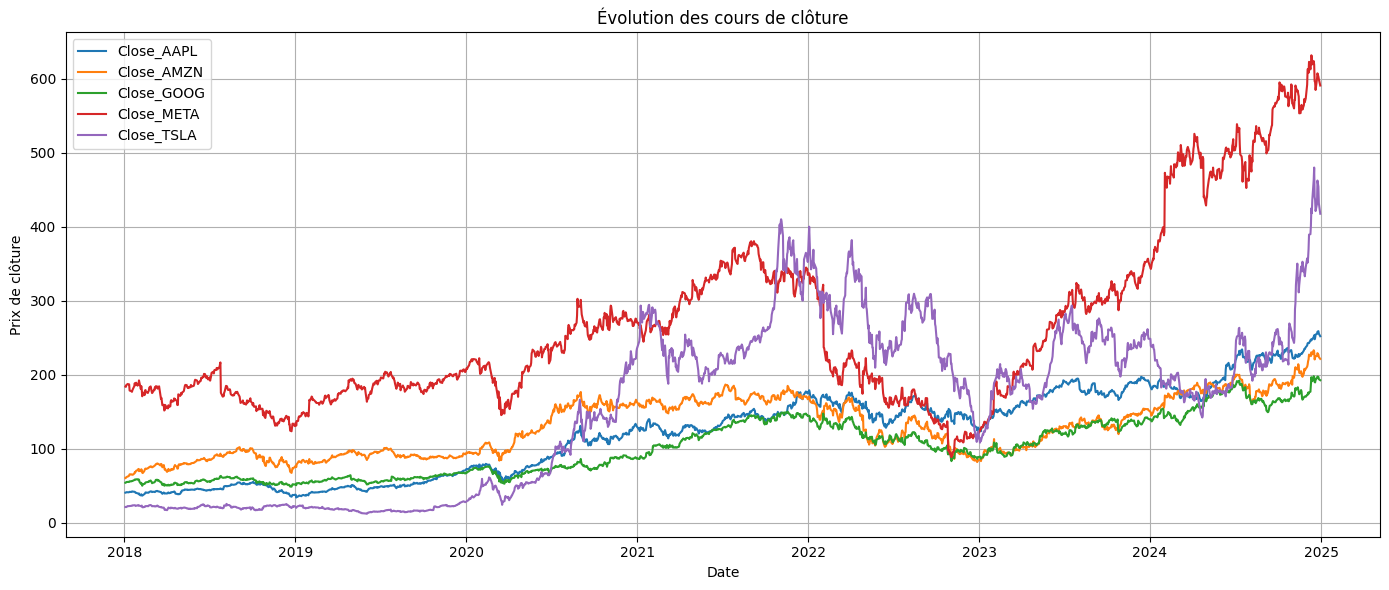

<Figure size 640x480 with 0 Axes>

In [16]:
df_final.describe()

#Première visusalisation : La cloture
plt.figure(figsize=(14,6))
for col in df_final.columns:
    if "Close" in col:
        plt.plot(df_final["Date"], df_final[col], label=col)

plt.title("Évolution des cours de clôture")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig("evolution_cours_cloture.png", dpi=300, bbox_inches='tight')


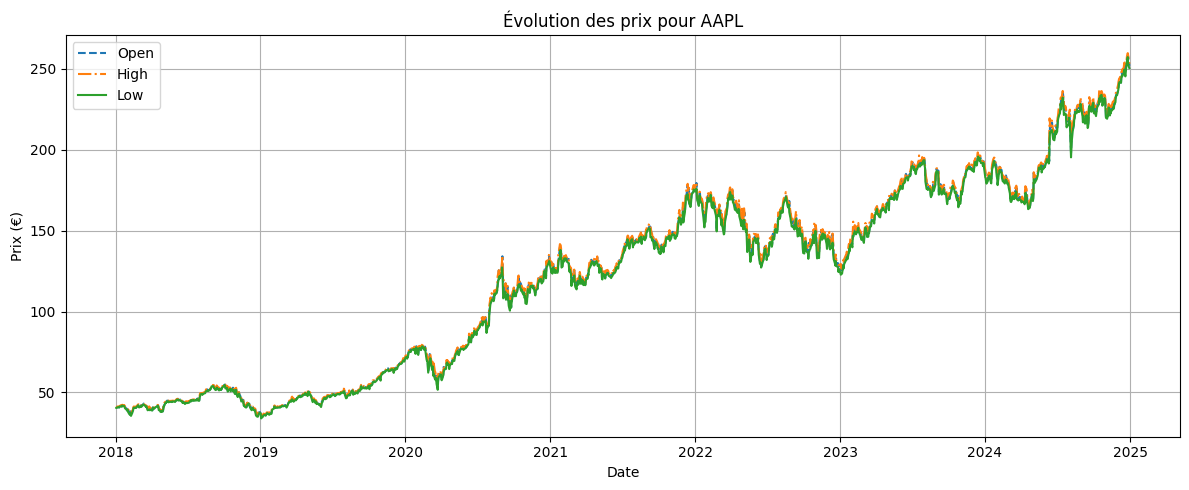

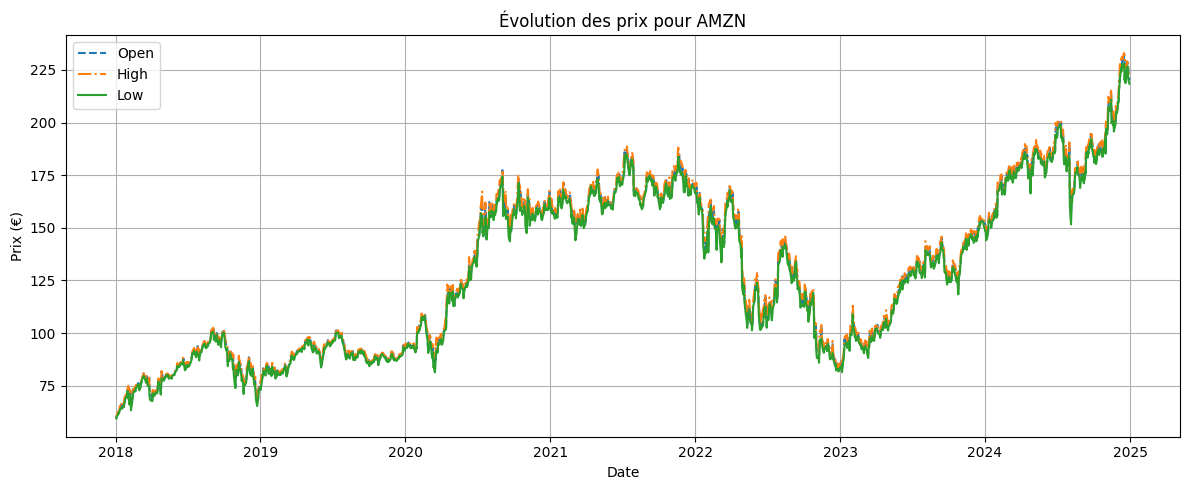

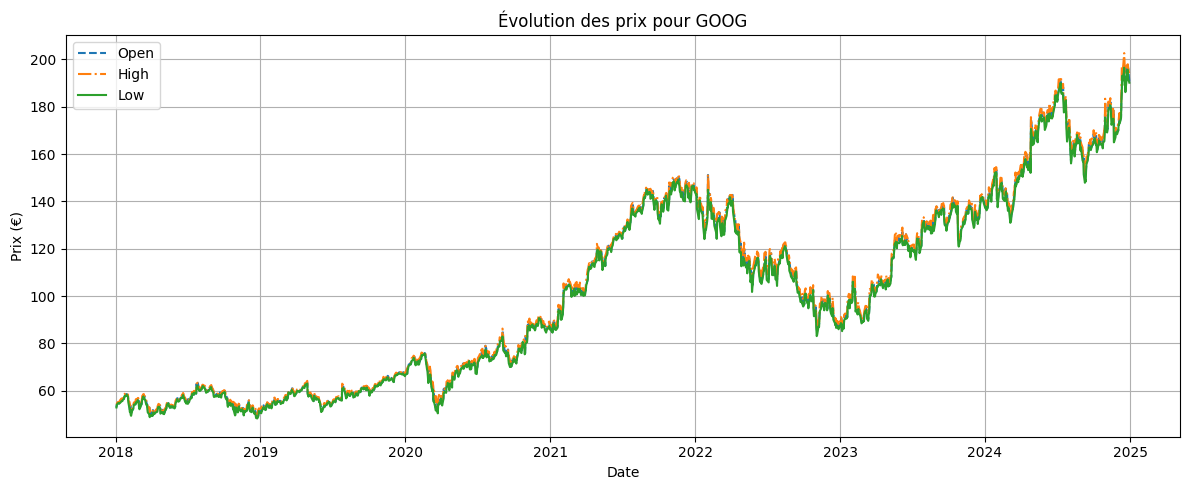

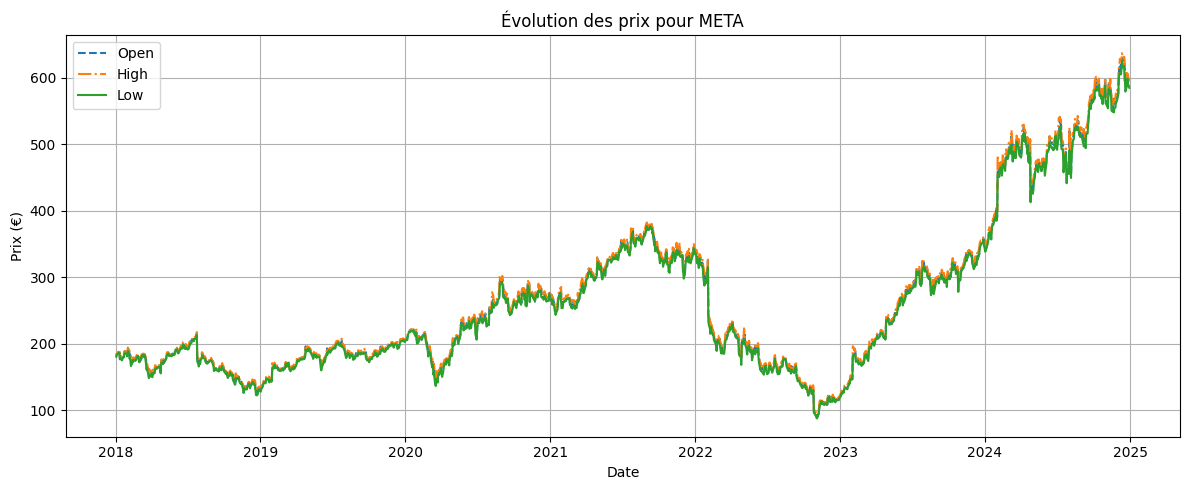

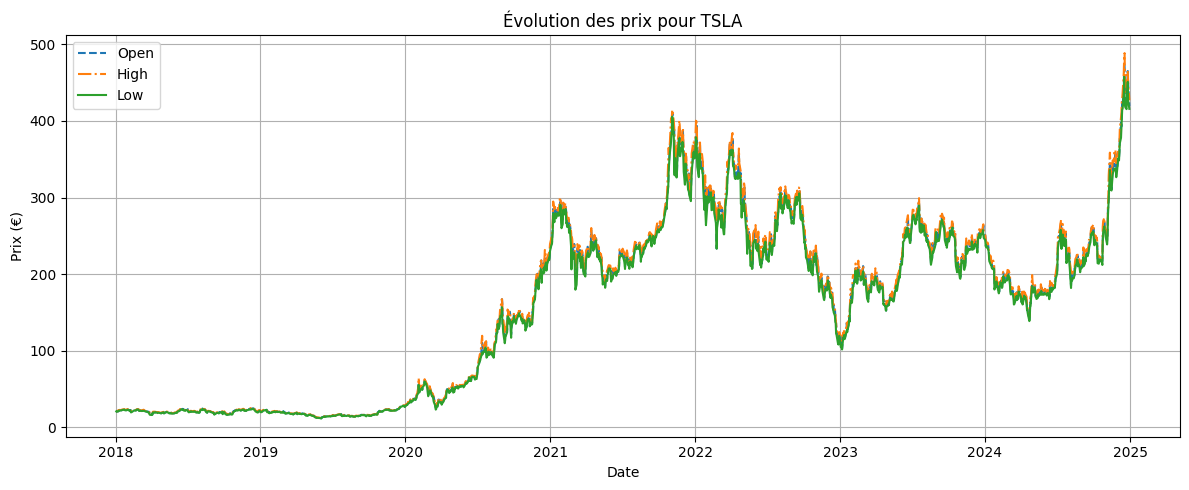

In [23]:
#Deuxième visualisation : High, Low et Open 
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'TSLA']
for ticker in tickers:
    plt.figure(figsize=(12, 5))
    
    plt.plot(df_final["Date"], df_final[f"Open_{ticker}"], label="Open", linestyle='--')
    plt.plot(df_final["Date"], df_final[f"High_{ticker}"], label="High", linestyle='-.')
    plt.plot(df_final["Date"], df_final[f"Low_{ticker}"], label="Low", linestyle='-')
    
    plt.title(f"Évolution des prix pour {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Prix (€)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

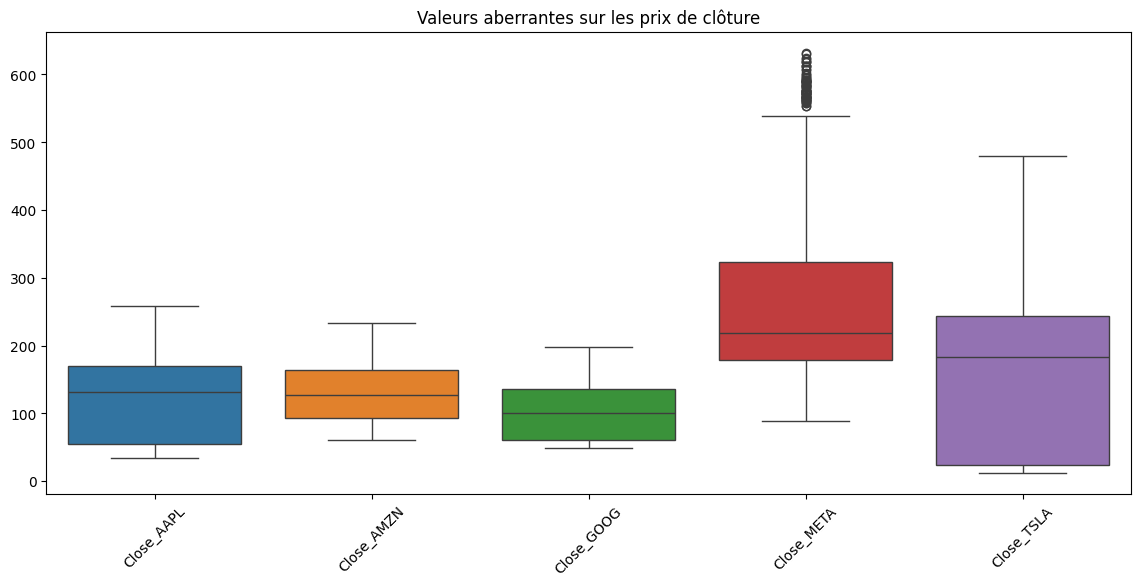

In [17]:
#Valeurs aberrantes : 
plt.figure(figsize=(14,6))
close_cols = [col for col in df_final.columns if "Close" in col]
sns.boxplot(data=df_final[close_cols])
plt.title("Valeurs aberrantes sur les prix de clôture")
plt.xticks(rotation=45)
plt.show()

### Prétraitement des données

In [18]:
colonnes_a_standardiser = df_final.drop(columns=["Date"]).columns
scaler = StandardScaler()
data_std = scaler.fit_transform(df_final[colonnes_a_standardiser])

df_std_final = pd.DataFrame(data_std, columns=colonnes_a_standardiser)
df_std_final["Date"] = df_final["Date"].values  
df_std_final.head()

,Close_AAPL,Close_AMZN,Close_GOOG,Close_META,Close_TSLA,High_AAPL,High_AMZN,High_GOOG,High_META,High_TSLA,...,Open_AMZN,Open_GOOG,Open_META,Open_TSLA,Volume_AAPL,Volume_AMZN,Volume_GOOG,Volume_META,Volume_TSLA,Date
0,-1.380590,-1.781206,-1.210623,-0.674212,-1.219266,-1.380912,-1.802267,-1.221271,-0.694954,-1.218126,...,-1.801228,-1.231839,-0.695858,-1.216272,0.324081,-0.351317,-0.000003,-0.375099,-0.753661,2018-01-03
1,-1.377416,-1.774258,-1.205677,-0.677039,-1.220828,-1.385164,-1.789013,-1.212173,-0.683188,-1.222015,...,-1.779716,-1.201946,-0.670768,-1.221097,-0.189048,-0.394940,-0.646336,-0.565587,0.268648,2018-01-04
2,-1.369600,-1.749056,-1.185703,-0.656089,-1.219664,-1.377685,-1.772069,-1.198827,-0.677511,-1.222775,...,-1.763600,-1.194375,-0.665036,-1.218871,-0.100277,-0.131992,-0.229470,-0.585005,-0.740526,2018-01-05
3,-1.372178,-1.726201,-1.179760,-0.644201,-1.207888,-1.376740,-1.741500,-1.190054,-0.661055,-1.211294,...,-1.739782,-1.183990,-0.651660,-1.219239,-0.324283,0.237725,-0.581035,-0.304873,0.252271,2018-01-08
4,-1.372258,-1.718685,-1.180618,-0.647609,-1.209503,-1.378905,-1.733519,-1.190928,-0.661878,-1.210261,...,-1.712859,-1.174942,-0.639198,-1.207870,-0.250667,-0.073325,-0.801389,-0.659877,-0.258959,2018-01-09


In [19]:
#sauvegarde csv final: 
df_std_final.to_csv("donnees_boursieres_standardisees.csv", index=False)

### 3. Segmentation du marché boursier (Clustering)

In [20]:
# Entraînement du modèle KMeans avec k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(df_std_final.drop(columns=["Date"]))

# Ajouter la colonne cluster au DataFrame
df_std_final["Cluster_KMeans_2"] = clusters_2
print (df_std_final["Cluster_KMeans_2"].value_counts)


<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
1754    1
1755    1
1756    1
1757    1
1758    1
Name: Cluster_KMeans_2, Length: 1759, dtype: int32>


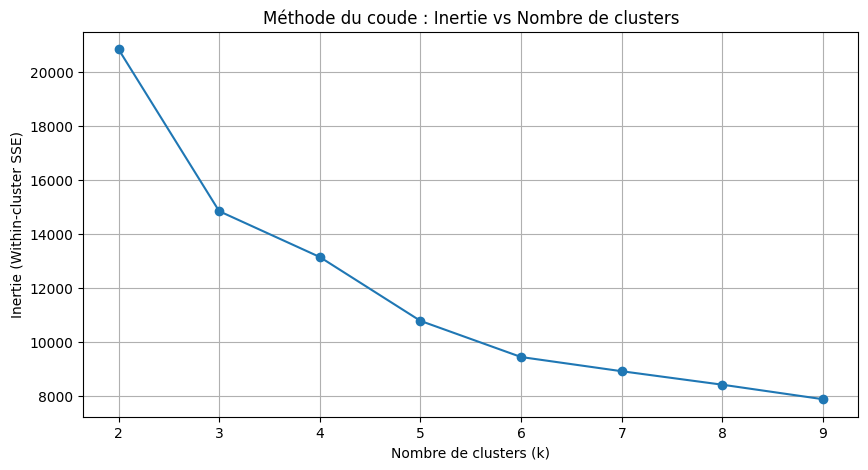

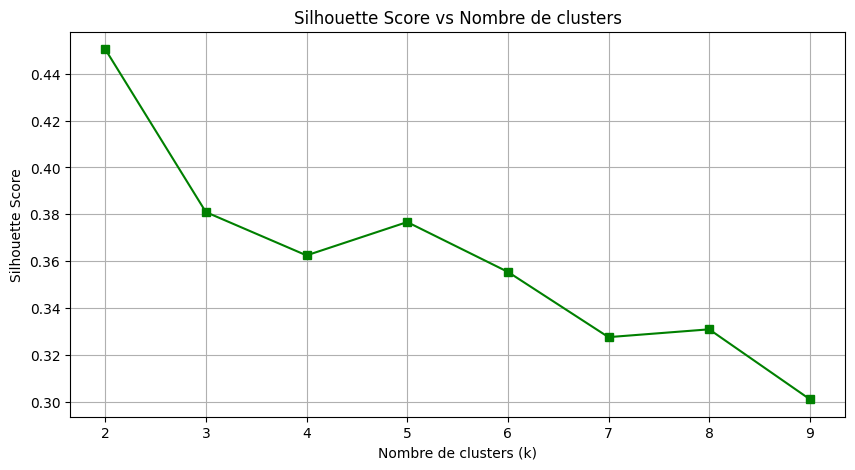

In [21]:
#Nombre optimal des clusters :
inertias = []
silhouettes = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_std_final.drop(columns=["Date", "Cluster_KMeans_2"]))
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(df_std_final.drop(columns=["Date", "Cluster_KMeans_2"]), km.labels_))

plt.figure(figsize=(10,5))
plt.plot(k_range, inertias, marker='o')
plt.title("Méthode du coude : Inertie vs Nombre de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (Within-cluster SSE)")
plt.grid(True)
plt.show()

#Silhouette score 
plt.figure(figsize=(10,5))
plt.plot(k_range, silhouettes, marker='s', color='green')
plt.title("Silhouette Score vs Nombre de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


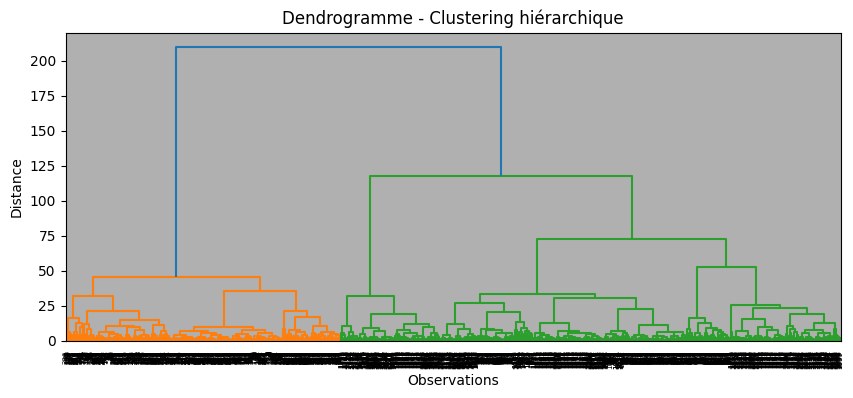

In [22]:
# clustering hiérarchique et compare les résultats avec K-Means.
plt.figure(figsize=(10, 4))
dendro = sch.dendrogram(sch.linkage(df_std_final.drop(columns=["Date", "Cluster_KMeans_2"]), method='ward'))
plt.title("Dendrogramme - Clustering hiérarchique")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

#avec 2 clusters
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters_hier = hc.fit_predict(df_std_final.drop(columns=["Date", "Cluster_KMeans_2"]))
df_std_final["Cluster_Hierarchique_2"] = clusters_hier

In [23]:
#comparaison entre le K-means et l'Cluster_Hierarchique 
print(df_std_final[["Cluster_KMeans_2", "Cluster_Hierarchique_2"]].value_counts())


Cluster_KMeans_2  Cluster_Hierarchique_2
1                 0                         956
0                 1                         625
                  0                         178
Name: count, dtype: int64


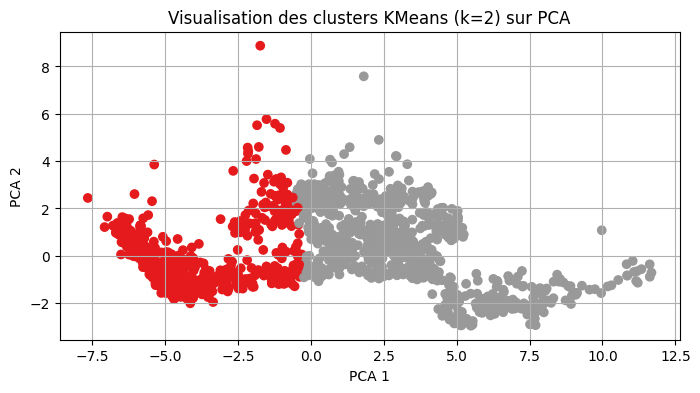

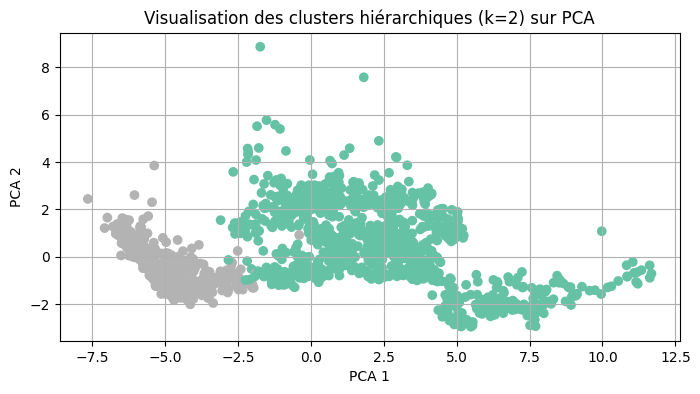

In [24]:
#visualisation en 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_std_final.drop(columns=["Date", "Cluster_KMeans_2", "Cluster_Hierarchique_2"]))

df_std_final["PCA1"] = pca_components[:, 0]
df_std_final["PCA2"] = pca_components[:, 1]

#Clusters KMeans sur le plan PCA
plt.figure(figsize=(8,4))
plt.scatter(df_std_final["PCA1"], df_std_final["PCA2"], c=df_std_final["Cluster_KMeans_2"], cmap='Set1', label='KMeans')
plt.title("Visualisation des clusters KMeans (k=2) sur PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

#Clusters hiérarchiques sur PCA
plt.figure(figsize=(8,4))
plt.scatter(df_std_final["PCA1"], df_std_final["PCA2"], c=df_std_final["Cluster_Hierarchique_2"], cmap='Set2', label='Hiérarchique')
plt.title("Visualisation des clusters hiérarchiques (k=2) sur PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


### 5. Détection d’anomalies

In [25]:
iso_model = IsolationForest(contamination=0.05, random_state=42)
anomaly_labels = iso_model.fit_predict(df_std_final.drop(columns=["Date", "Cluster_KMeans_2", "Cluster_Hierarchique_2", "PCA1", "PCA2"]))

#Colonne anomalie ajoutée -1 = anomalie, 1 = normal
df_std_final["Anomalie"] = anomaly_labels 
print(df_std_final["Anomalie"].value_counts())


Anomalie
 1    1671
-1      88
Name: count, dtype: int64


In [32]:
df_anomalies = df_std_final[df_std_final["Anomalie"] == -1]
df_anomalies_dates = df_anomalies["Date"]
print(df_anomalies_dates.head(35))


22     2018-02-05
26     2018-02-09
58     2018-03-28
223    2018-11-20
243    2018-12-20
244    2018-12-21
245    2018-12-24
246    2018-12-26
251    2019-01-03
523    2020-02-03
524    2020-02-04
550    2020-03-12
553    2020-03-17
624    2020-06-26
634    2020-07-13
648    2020-07-31
672    2020-09-03
673    2020-09-04
682    2020-09-18
1029   2022-02-03
1030   2022-02-04
1213   2022-10-27
1214   2022-10-28
1216   2022-11-01
1218   2022-11-03
1219   2022-11-04
1588   2024-04-26
1626   2024-06-21
1631   2024-06-28
1632   2024-07-01
1633   2024-07-02
1634   2024-07-03
1635   2024-07-05
1636   2024-07-08
1637   2024-07-09
Name: Date, dtype: datetime64[ns]


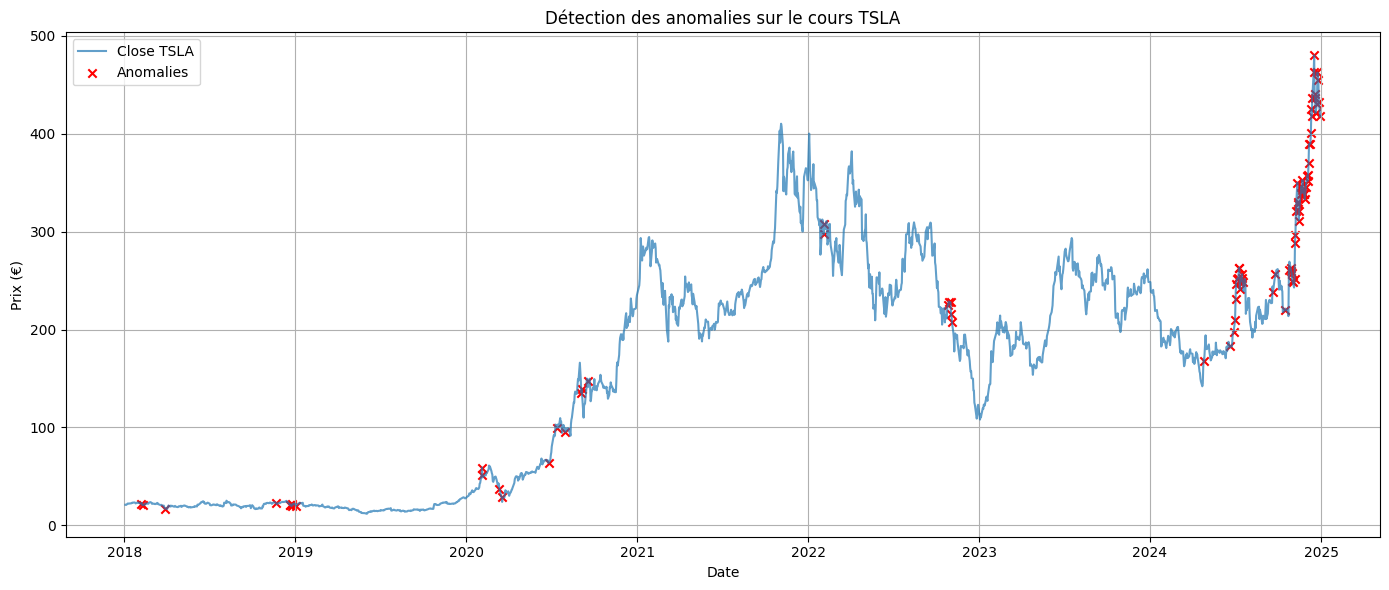

In [27]:
plt.figure(figsize=(14,6))
plt.plot(df_std_final["Date"], df_final["Close_TSLA"], label="Close TSLA", alpha=0.7)
plt.scatter(df_anomalies["Date"], df_final.loc[df_anomalies.index, "Close_TSLA"], color='red', label='Anomalies', marker='x')
plt.title("Détection des anomalies sur le cours TSLA")
plt.xlabel("Date")
plt.ylabel("Prix (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Expliquation des causes potentielles de ces anomalies (événements macroéconomiques, crises,
décisions d’entreprise…).

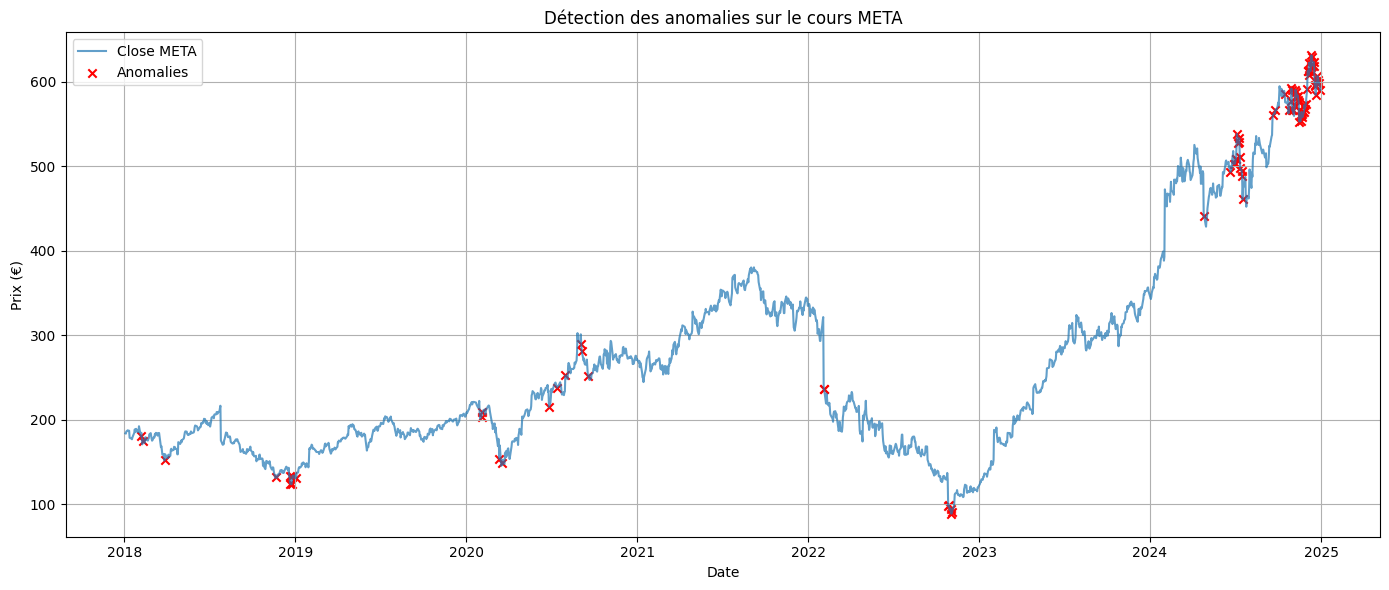

In [48]:
plt.figure(figsize=(14,6))
plt.plot(df_std_final["Date"], df_final["Close_META"], label="Close META", alpha=0.7)
plt.scatter(df_anomalies["Date"], df_final.loc[df_anomalies.index, "Close_META"], color='red', label='Anomalies', marker='x')
plt.title("Détection des anomalies sur le cours META")
plt.xlabel("Date")
plt.ylabel("Prix (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

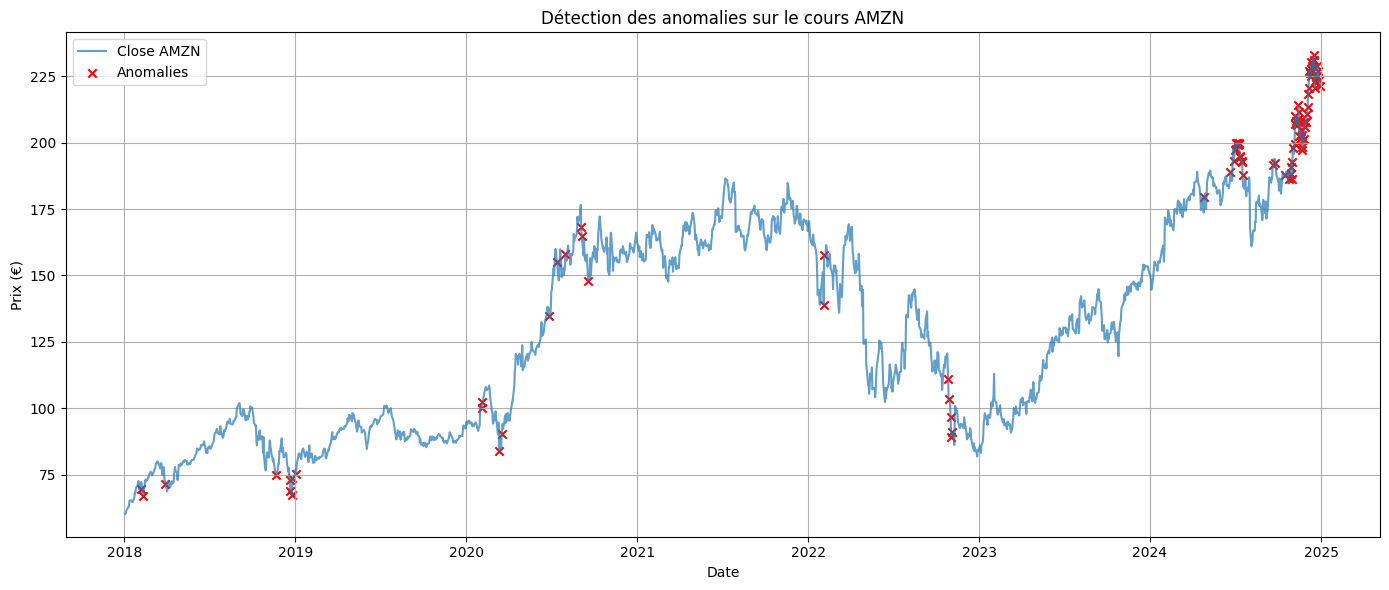

In [49]:
plt.figure(figsize=(14,6))
plt.plot(df_std_final["Date"], df_final["Close_AMZN"], label="Close AMZN", alpha=0.7)
plt.scatter(df_anomalies["Date"], df_final.loc[df_anomalies.index, "Close_AMZN"], color='red', label='Anomalies', marker='x')
plt.title("Détection des anomalies sur le cours AMZN")
plt.xlabel("Date")
plt.ylabel("Prix (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()